### minimize noise in the model in comparison to in vitro experiments (Reber lab)

# what are the parameters

P_hyd = Binomial(1,p_hyd) = Prob to hydrolize from GTP to GDP:  GTPase rate <br>
P_polym = Binomial(1,p_polym) = Prob to Polymerize/bind to the microtuble <br>
P_depolym_GTP = Binomial(1,p_depolym_GTP) = Prob to depolimerize if not hydrolized (GTP - tubulin) = lower <br>
P_depolym_GDP = Binomial(1,p_depolym_GDP) = Prob to depolimerize if hydrolized (GDP - tubulin) = higher <br>
P_GTP_exchange = Binomial(1,p_GTP_exchange) = Prob to exchange GDP to GTP

### 1. Loading packages and functions

In [38]:
using Agents
using Statistics
using DataFrames
using Distributions
using StatsBase
using DrWatson: @dict
using Serialization
using InteractiveDynamics
using GLMakie
import ColorSchemes as co
using DataFramesMeta
using Plots
using CairoMakie

include("01_Agent.jl")
include("02_Initialization.jl")
include("03_AgentStep.jl")
include("04_ModelStep.jl")
include("05_Analysis.jl")


mean_velocity_cat (generic function with 1 method)

In [67]:
using CairoMakie

In [70]:
?hspan!

search:

 hspan! tight_ticklabel_spacing! tight_yticklabel_spacing!

Couldn't find hspan!
Perhaps you meant hspan!, hspan, vspan!, vspan, span, ispath, spy! or swap!


No documentation found.

Binding `hspan!` does not exist.


# 2. Initializing model

In [5]:
#function for mean of all MT-lengths over time and for every single seed
function mean_MT_size(model)
    meanMTL = mean([count(i->(i==n), [model.agents[i].polym for i in 1:length(model.agents)]) for n in 1:model.Nstarts])
end

function MT_size_1(model)
    MT_size_1 = count(i->(i==1), [model.agents[i].polym for i in 1:length(model.agents)])
end

MT_size_1 (generic function with 1 method)

In [6]:
#example for intitialization and data collection
#Initialize Model with fixed parameters
model=initialize(; Nstarts = 1,
        periodic = true,
        numagents = 1000,
        griddims = (100,100), 
        p_polym = 1.0,
        p_hyd = 0.024,
        p_GTP_exchange = 0.01,
        p_depolym_GTP = 0.0,
        p_depolym_GDP = 0.2)

mdata = [mean_MT_size, MT_size_1]

#running the model and data collection
modeldata = run!(model,agent_step!,model_step!, 3600; mdata)

(0×0 DataFrame, 3601×3 DataFrame
  Row │ step   mean_MT_size  MT_size_1 
      │ Int64  Float64       Int64     
──────┼────────────────────────────────
    1 │     0           1.0          1
    2 │     1           1.0          1
    3 │     2           1.0          1
    4 │     3           1.0          1
    5 │     4           1.0          1
    6 │     5           1.0          1
    7 │     6           1.0          1
    8 │     7           1.0          1
    9 │     8           1.0          1
   10 │     9           1.0          1
   11 │    10           1.0          1
  ⋮   │   ⋮         ⋮            ⋮
 3592 │  3591          77.0         77
 3593 │  3592          77.0         77
 3594 │  3593          77.0         77
 3595 │  3594          77.0         77
 3596 │  3595          77.0         77
 3597 │  3596          77.0         77
 3598 │  3597          77.0         77
 3599 │  3598          77.0         77
 3600 │  3599          77.0         77
 3601 │  3600          77.0     

# plotting with abmplot

In [10]:
#Initialize Model
model=initialize(; Nstarts = 1,
        periodic = true,
        numagents = 1000,
        griddims = (100,100), 
        p_polym = 1.0,                       
        p_hyd = 0.02,
        p_GTP_exchange = 0.015,
        p_depolym_GTP = 0.0,                 
        p_depolym_GDP = 0.3) 
# aesthetics
groupcolor(a) = a.polym == 0 ? :blue : a.id <= model.Nstarts ? :red : :green 
groupmarker(a) = a.GDP == true ? '●' : '○'
# figure
fig2, ax = abmplot(model; agent_step!, model_step!, ac=groupcolor, am=groupmarker)

(Scene (800px, 600px):
  29 Plots:
    ├ Combined{Makie.poly, Tuple{Vector{Vector{Point{2, Float32}}}}}
    ├ LineSegments{Tuple{Vector{Point{2, Float32}}}}
    ├ LineSegments{Tuple{Vector{Point{2, Float32}}}}
    ├ LineSegments{Tuple{Vector{Point{2, Float32}}}}
    ├ LineSegments{Tuple{Vector{Point{2, Float32}}}}
    ├ LineSegments{Tuple{Vector{Point{2, Float32}}}}
    ├ LineSegments{Tuple{Vector{Point{2, Float32}}}}
    ├ MakieCore.Text{Tuple{String}}
    ├ Lines{Tuple{Vector{Point{2, Float32}}}}
    ├ MakieCore.Text{Tuple{Vector{Tuple{AbstractString, Point{2, Float32}}}}}
    ├ LineSegments{Tuple{Vector{Point{2, Float32}}}}
    ├ LineSegments{Tuple{Vector{Point{2, Float32}}}}
    ├ MakieCore.Text{Tuple{String}}
    ├ Lines{Tuple{Vector{Point{2, Float32}}}}
    ├ MakieCore.Text{Tuple{Vector{Tuple{AbstractString, Point{2, Float32}}}}}
    ├ Lines{Tuple{Vector{Point{2, Float32}}}}
    ├ Lines{Tuple{Vector{Point{2, Float32}}}}
    ├ MakieCore.Text{Tuple{String}}
    ├ Scatter{Tuple{Vect

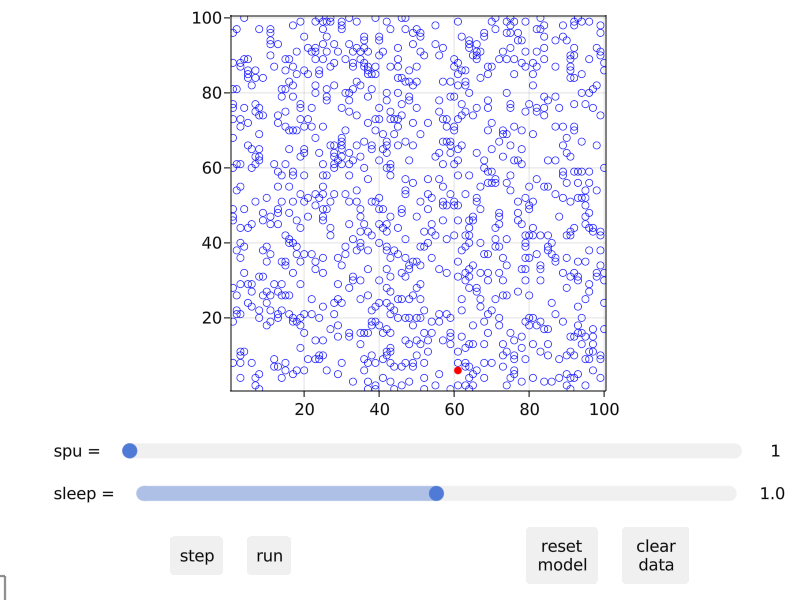

In [11]:
fig2

# plotting with abmexploration
use fixed and variable parameters (p_hyd and p_polym) to interactively explore their impact on the dynamic instability of the MT
--> only 1 seed is used

In [18]:
#Initialize Model
model=initialize(; Nstarts = 1,
        periodic = true,
        numagents = 1000,
        griddims = (100,100), 
        p_polym = 1.0,
        p_hyd = 0.02,
        p_GTP_exchange = 0.015,
        p_depolym_GTP = 0.0,
        p_depolym_GDP = 0.3) 

#define variable parameters
params = Dict(
    :p_hyd => 0:0.01:1,
    :p_polym => 0:0.01:1,
)

# aesthetics
groupcolor(a) = a.polym == 0 ? :blue : a.id <= model.Nstarts ? :red : :green 
groupmarker(a) = a.GDP == true ? '●' : '○'
# data that will be collected during exploration and plotted in the interactive plot
mdata = [MT_size_1]
mlabels =["MT 1"]

fig3, abmobs = abmexploration(
    model; agent_step!, model_step!, params,
    ac = groupcolor, am = groupmarker, mdata, mlabels
)
display(fig3) 
#model and agent df can further be used to plot (see below)
adf, mdf = Agents.run!(model, agent_step!, model_step!, 1800; mdata)

(0×0 DataFrame, 1801×2 DataFrame
  Row │ step   MT_size_1 
      │ Int64  Int64     
──────┼──────────────────
    1 │     0          1
    2 │     1          1
    3 │     2          1
    4 │     3          2
    5 │     4          2
    6 │     5          2
    7 │     6          2
    8 │     7          2
    9 │     8          2
   10 │     9          2
   11 │    10          2
  ⋮   │   ⋮        ⋮
 1792 │  1791         29
 1793 │  1792         29
 1794 │  1793         29
 1795 │  1794         29
 1796 │  1795         29
 1797 │  1796         29
 1798 │  1797         29
 1799 │  1798         29
 1800 │  1799         29
 1801 │  1800         29
        1780 rows omitted)

try different parameters with abmexploration for p_polym and p_hyd save figs with different parameters (each 3 times) to get an overview. See if changing these parameters helps reduce noice in MT growth

In [19]:
para1 = fig3
save("results/data/processed/P_polym1_p_hyd0.02.png", para1)

GLMakie.Screen(...)

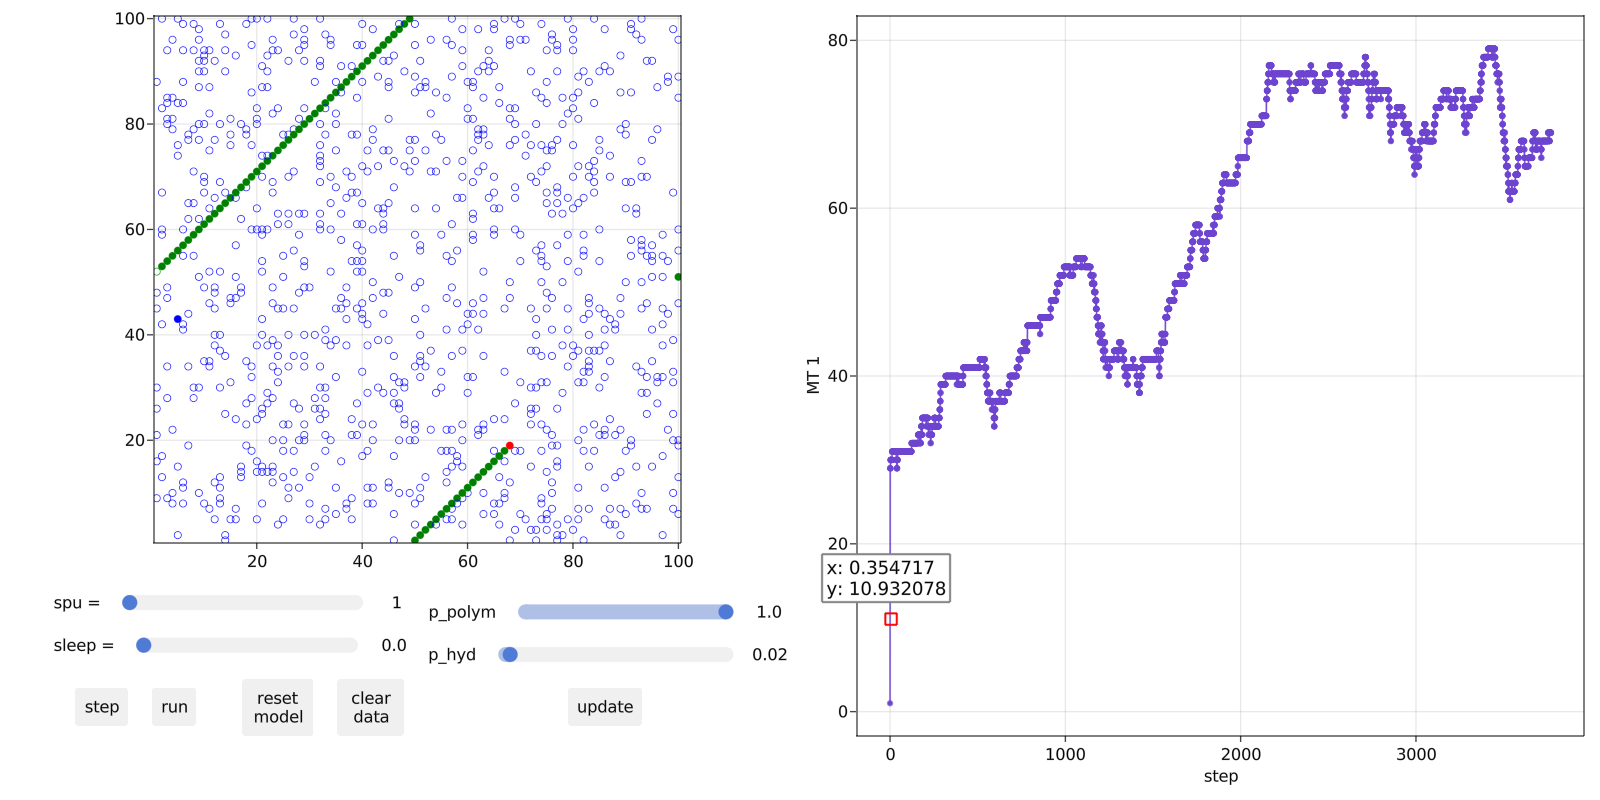

In [20]:
fig3

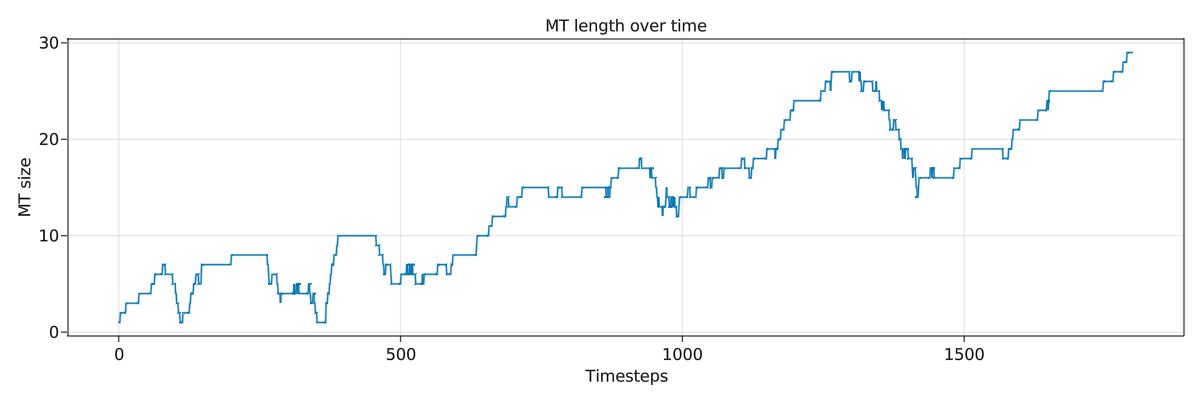

In [22]:
f1 = Figure(resolution =(1200,400))
#delete!(ax1)
ax1 = Axis(f1[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "MT length over time")
liney = lines!(ax1, mdf.step, mdf.MT_size_1) 
f1

In [24]:
#growth_rate function from valentin (8 - 1.1)

In [29]:
#count number of +1, -1 and 0 in each 250 step section and determine if this section is overall shrinking or growing
#use MT_size_1 instead of mean_MT_size (if only one MT is observed)
function growth_rate!(df) 
    df.growthrate = zeros(nrow(df))
    for n in 2:nrow(df)
        if df.step[n] == 0
            df.growthrate[n]=0
        elseif df.step[n]>0
            df.growthrate[n]= df[n,:MT_size_1]-df[n-1,:MT_size_1]
        end
    end
    return df
end

growth_rate! (generic function with 1 method)

In [31]:
growth_rate!(mdf)

,step,MT_size_1,growthrate
,Int64,Int64,Float64
1,0,1,0.0
2,1,1,0.0
3,2,1,0.0
4,3,2,1.0
5,4,2,0.0
6,5,2,0.0
7,6,2,0.0
8,7,2,0.0
9,8,2,0.0


In [ ]:
#growth classification

In [34]:
function growth_classification!(df; section_size = 250)
    df.growthrate = zeros(nrow(df))
    for n in 2:nrow(df)
        if df.step[n] == 0
            df.growthrate[n]=0
        elseif df.step[n]>0
            df.growthrate[n]= df[n,:MT_size_1]-df[n-1,:MT_size_1]
        end
    end

    df.growthclass = [0 for i in 1:nrow(df)]
    for i in collect(1:section_size:maximum(df.step)-section_size+1)
        section = collect(i:i+section_size-1)
        count_plus = count(x -> (x == 1.0), df.growthrate[section])
        count_minus = count(x -> (x == -1.0), df.growthrate[section])
        growthclass = count_minus >= 0.08*section_size ? -1.0 : count_plus >= 0.012*section_size ? 1.0 : 0.0

        for n in section
            df.growthclass[n] = growthclass
        end
    end

    df.growthclass_group = [1 for i in 1:nrow(df)]
    for (i,v) in enumerate(df.growthclass)
        if i == 1
            continue
        elseif v == df.growthclass[i-1]
            df.growthclass_group[i] = df.growthclass_group[i-1]
        else
            df.growthclass_group[i] = df.growthclass_group[i-1] + 1
        end
    end
    return df
end

growth_classification! (generic function with 1 method)

In [35]:
growth_classification!(mdf)

,step,MT_size_1,growthrate,growthclass,growthclass_group
,Int64,Int64,Float64,Int64,Int64
1,0,1,0.0,1,1
2,1,1,0.0,1,1
3,2,1,0.0,1,1
4,3,2,1.0,1,1
5,4,2,0.0,1,1
6,5,2,0.0,1,1
7,6,2,0.0,1,1
8,7,2,0.0,1,1
9,8,2,0.0,1,1


Visualization of MT size classified in growth and catastrophe for 250 steps

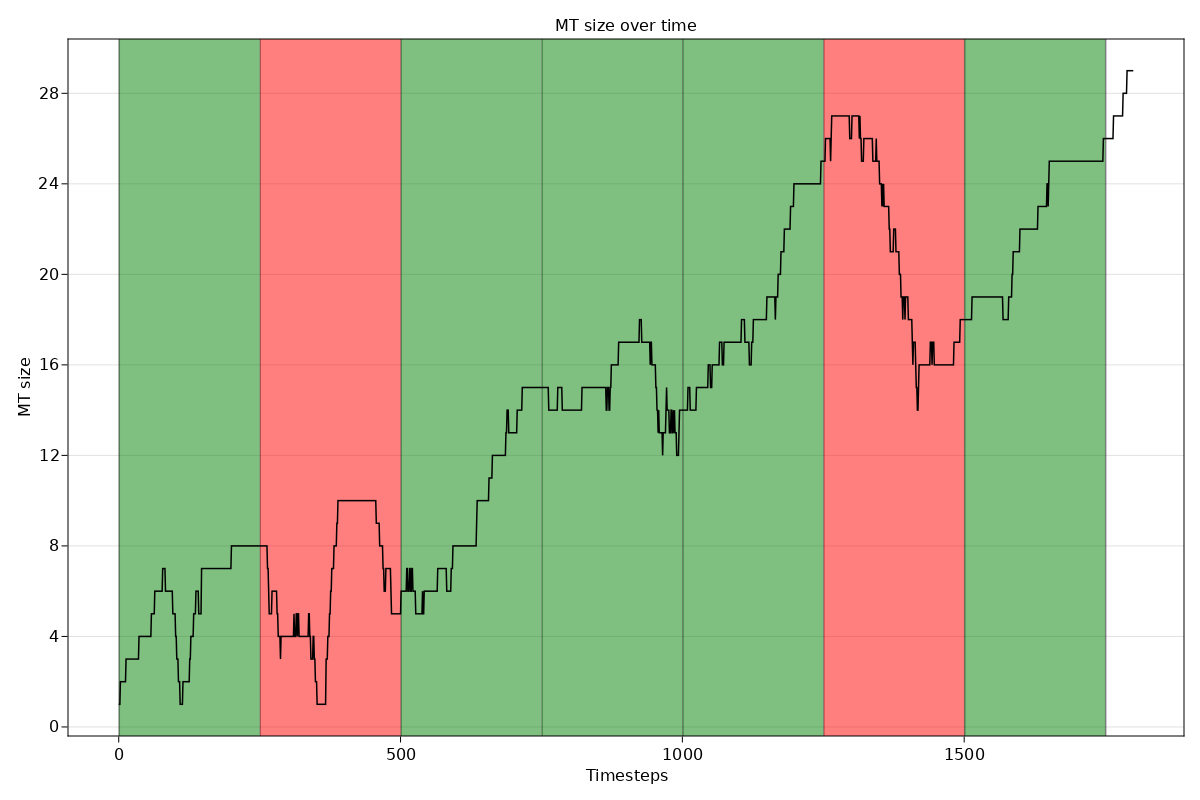

In [73]:
f4 = Figure(resolution =(1200, 800))
ax1_1 = Axis(f4[1,1:2]; xlabel = "Timesteps", ylabel = "MT size", title = "MT size over time", yticks=LinearTicks(10))

for i in collect(1:250:1801) #here use number of steps
    vlines!(ax1_1, i, color = (:black, 0.5))
end

for i in collect(1:250:1801)
    if mdf.growthclass[i] == -1.0
        CairoMakie.vspan!(ax1_1, i, i+249, color = (:red, 0.5), label = "catastrophe")  #use CarioMakie.vspan! bc of conflict with plots
    elseif mdf.growthclass[i] == 1.0
        CairoMakie.vspan!(ax1_1, i, i+249, color = (:green, 0.5), label = "growth")
    end
end
lines!(ax1_1, mdf.step, mdf.MT_size_1, label = "MT length", color = :black)
f4

In [ ]:
#velocity funtion

In [4]:
function velocity(df)
    df_new = DataFrame(growthclass_group = [i for i in 1:maximum(df.growthclass_group)], velocity = zeros(maximum(df.growthclass_group)))

    for i in 1:maximum(df.growthclass_group) #find minimum/maximum of MT lenght and corresponding step for each group
        sub_df = @subset(df, :growthclass_group .== i)
        MT_min = minimum(sub_df.mean_MT_size)
        MT_max = maximum(sub_df.mean_MT_size)
        for (i,v) in enumerate(sub_df.mean_MT_size)
            if v == MT_min
                step_min = sub_df.step[i]
            end
            if v == MT_max
                step_max = sub_df.step[i]
            end
        end
        #calculate velocities for each group (should be negative if group is shrinking)
        if sub_df.growthclass[1] == 1.0
            df_new.velocity[i] = (MT_max-MT_min)/(step_max - step_min)
        elseif sub_df.growthclass[1] == -1.0
            df_new.velocity[i] = (MT_min-MT_max)/(step_max - step_min)
        else
            df_new.velocity[i] = 0
        end   
    end
    return df_new
end

function mean_velocity_grow(df)
    grow_velocities = [df.velocity[i] for i in 1:nrow(df) if df.velocity[i] > 0]
    if isempty(grow_velocities)
        mean_velocity_grow = 0
    else
        mean_velocity_grow = mean(grow_velocities)
    end
end

function mean_velocity_cat(df)
    cat_velocities = [df.velocity[i] for i in 1:nrow(df) if df.velocity[i] < 0]
    if isempty(cat_velocities)
        mean_velocity_cat = 0
    else
        mean_velocity_cat = mean(cat_velocities)
    end
end

mean_velocity_cat (generic function with 1 method)